https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# Importing Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import joblib

from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [15]:
wine = pd.read_csv("/Users/yunperez/Documents/GitHub/EC_Project/data/winequality.csv")
wine.sample(25)

,density,alcohol,citric_acid,residual_sugar,pH,type,quality
4083,1.962984,3.739130,2.734940,1.082822,4.906977,0,2
2486,2.650087,2.043478,2.734940,2.338957,3.093023,0,2
4461,2.042799,4.391304,2.301205,1.248466,4.837209,0,3
2379,2.396761,3.086957,2.030120,1.193252,6.372093,0,1
10,1.640254,6.217391,3.222892,1.117331,2.883721,0,2
5365,2.316946,8.826087,3.439759,1.276074,5.186047,1,3
1127,1.848467,6.217391,2.572289,1.724693,4.558140,0,4
4013,2.521689,3.347826,2.301205,2.504601,3.511628,0,3
3673,1.053788,8.304348,2.626506,1.082822,5.116279,0,4
3440,1.546559,6.217391,2.734940,1.110429,4.069767,0,2


In [16]:
 # Load dataset
data = pd.read_csv("/Users/yunperez/Documents/GitHub/EC_Project/data/winequality.csv")
# Check for missing values
data.isna().sum()
# Remove duplicate data
data.drop_duplicates(keep='first')
# Calculate the correlation matrix
corr_matrix = data.corr()
# Label quality into Good (1) and Bad (0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)
    # Drop the target variable
X = data.drop('quality', axis=1)
# Set the target variable as the label
y = data['quality']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   density         6497 non-null   float64
 1   alcohol         6497 non-null   float64
 2   citric_acid     6497 non-null   float64
 3   residual_sugar  6497 non-null   float64
 4   pH              6497 non-null   float64
 5   type            6497 non-null   int64  
 6   quality         6497 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 355.4 KB


In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   density         6497 non-null   float64
 1   alcohol         6497 non-null   float64
 2   citric_acid     6497 non-null   float64
 3   residual_sugar  6497 non-null   float64
 4   pH              6497 non-null   float64
 5   type            6497 non-null   int64  
 6   quality         6497 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 355.4 KB


# Description

In [19]:
wine.describe()

,density,alcohol,citric_acid,residual_sugar,pH,type,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2.316362,4.250175,2.727529,1.668545,4.477913,0.246114,2.818378
std,0.520302,1.555711,0.787868,0.656752,1.121771,0.430779,0.873255
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.907461,2.956522,2.355422,1.165644,3.720930,0.000000,2.000000
50%,2.349913,4.000000,2.680723,1.331288,4.418605,0.000000,3.000000
75%,2.714286,5.304348,3.114458,2.035276,5.186047,0.000000,3.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,6.000000


# Finding Null Values

In [20]:
wine.isnull().sum()

density           0
alcohol           0
citric_acid       0
residual_sugar    0
pH                0
type              0
quality           0
dtype: int64

In [21]:
wine.groupby('quality').mean()

,density,alcohol,citric_acid,residual_sugar,pH,type
quality,,,,,,
0,2.498091,3.889130,2.523494,1.626687,4.751163,0.333333
1,2.339960,3.843599,2.476406,1.490542,4.569444,0.245370
2,2.516308,3.397108,2.668373,1.718360,4.433876,0.318522
3,2.292367,4.375069,2.754363,1.683248,4.472505,0.224965
4,2.043825,5.416529,2.814984,1.570326,4.544690,0.184430
5,1.937569,5.798378,2.802922,1.660216,4.510784,0.093264
6,1.754772,6.452174,3.092771,1.485890,5.102326,0.000000


# Data Analysis

## Countplot:

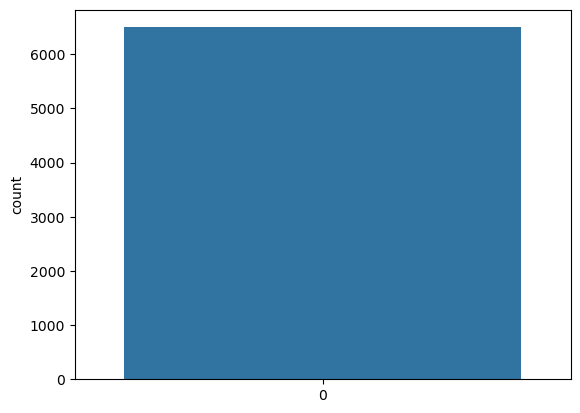

In [22]:
sns.countplot(wine['quality'])
plt.show()

density              Axes(0.125,0.712609;0.168478x0.167391)
alcohol           Axes(0.327174,0.712609;0.168478x0.167391)
citric_acid       Axes(0.529348,0.712609;0.168478x0.167391)
residual_sugar    Axes(0.731522,0.712609;0.168478x0.167391)
pH                   Axes(0.125,0.511739;0.168478x0.167391)
type              Axes(0.327174,0.511739;0.168478x0.167391)
quality           Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

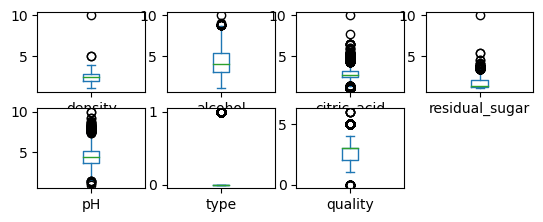

In [23]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

## Histogram

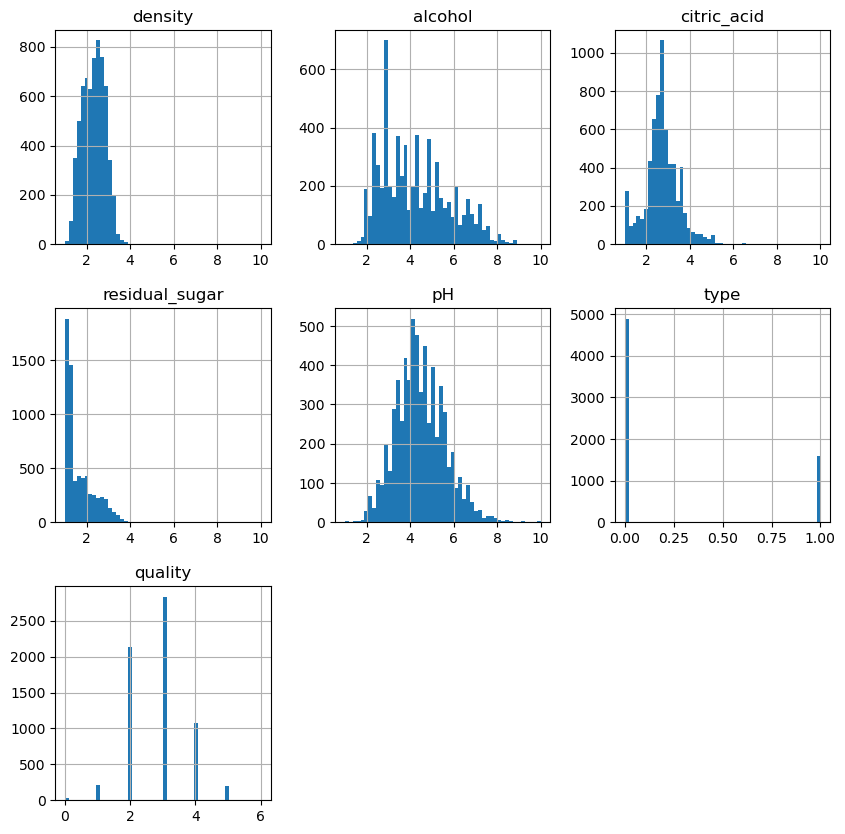

In [24]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

# Feature Selection

In [25]:
wine.sample(5)

,density,alcohol,citric_acid,residual_sugar,pH,type,quality
3648,1.924812,5.043478,2.355422,1.835123,2.255814,0,2
1333,1.674957,7.000000,3.114458,1.165644,3.581395,0,5
3156,2.688259,2.956522,3.277108,3.001534,2.046512,0,2
1958,3.531521,1.913043,3.981928,3.208589,2.674419,0,3
6375,1.817235,8.304348,1.596386,1.220859,6.720930,1,4


In [26]:
wine['quality'].unique()

array([3, 2, 4, 5, 1, 0, 6])

In [66]:
# If wine quality is 7 or above then will consider as good quality wine
wine['goodquality'] = [1 if x >= 3 else 0 for x in wine['quality']]
wine.sample(5)

,density,alcohol,citric_acid,residual_sugar,pH,type,quality,goodquality
2207,1.883169,5.304348,2.301205,1.455521,4.000000,0,4,1
2305,1.801619,6.478261,2.626506,1.607362,5.255814,0,4,1
1942,3.253904,1.782609,4.090361,2.987730,2.465116,0,2,0
1640,2.403702,3.608696,3.656627,1.883436,4.418605,0,2,0
2631,1.612493,5.826087,2.518072,1.248466,4.767442,0,4,1


In [67]:
# See total number of good vs bad wines samples
wine['goodquality'].value_counts()

1    4113
0    2384
Name: goodquality, dtype: int64

In [68]:
# Separate depedent and indepedent variables
X = wine.drop(['quality','goodquality'], axis = 1)
y = wine['goodquality']

In [52]:
X

,density,alcohol,citric_acid,residual_sugar,pH,type
0,3.410064,2.043478,2.951807,3.774540,2.953488,white
1,2.195489,2.956522,2.843373,1.138037,5.046512,white
2,2.386350,3.739130,3.168675,1.869632,4.767442,white
3,2.473106,3.478261,2.734940,2.090491,4.279070,white
4,2.473106,3.478261,2.734940,2.090491,4.279070,white
...,...,...,...,...,...,...
6492,2.351648,4.260870,1.433735,1.193252,6.093023,red
6493,2.389821,5.173913,1.542169,1.220859,6.581395,red
6494,2.497397,4.913043,1.704819,1.234663,5.883721,red
6495,2.450549,3.869565,1.650602,1.193252,6.930233,red


In [69]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    1
6494    1
6495    0
6496    1
Name: goodquality, Length: 6497, dtype: int64


# Feature Importance

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,y)
score = classifiern.feature_importances_
print(score)

[0.20371434 0.25302955 0.18363675 0.17584452 0.17065037 0.01312447]


# Splitting Dataset

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

# Result

In [72]:
model_res=pd.DataFrame(columns=['Model', 'Score'])

# LogisticRegression:

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
# accuracy_score(Y_test,Y_pred)
model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(y_test,y_pred)]
model_res



,Model,Score
0,LogisticRegression,0.71641


# Using KNN:

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['KNeighborsClassifier', accuracy_score(y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.716410
1,KNeighborsClassifier,0.717436


##### Using SVC:

In [75]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
model_res.loc[len(model_res)] = ['SVC', accuracy_score(y_test,y_pred)]
model_res

Accuracy Score: 0.7251282051282051


,Model,Score
0,LogisticRegression,0.716410
1,KNeighborsClassifier,0.717436
2,SVC,0.725128


# Using Decision Tree:

In [76]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
model_res.loc[len(model_res)] = ['DecisionTreeClassifier', accuracy_score(y_test,y_pred)]
model_res

Accuracy Score: 0.757948717948718


,Model,Score
0,LogisticRegression,0.716410
1,KNeighborsClassifier,0.717436
2,SVC,0.725128
3,DecisionTreeClassifier,0.757949


# Using GaussianNB:

In [77]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
model_res.loc[len(model_res)] = ['GaussianNB', accuracy_score(y_test,y_pred)]
model_res

Accuracy Score: 0.6671794871794872


,Model,Score
0,LogisticRegression,0.716410
1,KNeighborsClassifier,0.717436
2,SVC,0.725128
3,DecisionTreeClassifier,0.757949
4,GaussianNB,0.667179


# Using Random Forest:

In [78]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_score(y_test,y_pred)]
model_res

Accuracy Score: 0.7830769230769231


,Model,Score
0,LogisticRegression,0.716410
1,KNeighborsClassifier,0.717436
2,SVC,0.725128
3,DecisionTreeClassifier,0.757949
4,GaussianNB,0.667179
5,RandomForestClassifier,0.783077


# Using Xgboost:

In [79]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
model_res.loc[len(model_res)] = ['XGBClassifier', accuracy_score(y_test,y_pred)]
model_res

Accuracy Score: 0.757948717948718


,Model,Score
0,LogisticRegression,0.716410
1,KNeighborsClassifier,0.717436
2,SVC,0.725128
3,DecisionTreeClassifier,0.757949
4,GaussianNB,0.667179
5,RandomForestClassifier,0.783077
6,XGBClassifier,0.757949


In [80]:
model_res = model_res.sort_values(by='Score', ascending=False)
model_res

,Model,Score
5,RandomForestClassifier,0.783077
3,DecisionTreeClassifier,0.757949
6,XGBClassifier,0.757949
2,SVC,0.725128
1,KNeighborsClassifier,0.717436
0,LogisticRegression,0.716410
4,GaussianNB,0.667179


In [81]:
def complete_model(data):
    # Separate depedent and indepedent variables
    X = wine.drop(['quality','goodquality'], axis = 1)
    y = wine['goodquality']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

    # logistic regression
    model_lr = LogisticRegression(penalty = 'l2', solver='lbfgs')
    model_lr.fit(X_train, y_train)
    joblib.dump(model_lr, '/Users/yunperez/Documents/GitHub/EC_Project/data/model_lr.joblib')
    
    # KNN
    model_knn=KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    model_knn.fit(X_train, y_train)
    joblib.dump(model_knn,'/Users/yunperez/Documents/GitHub/EC_Project/data/model_knn.joblib')

    # SVC
    model_svc=SVC()
    model_svc.fit(X_train, y_train)
    joblib.dump(model_svc, '/Users/yunperez/Documents/GitHub/EC_Project/data/model_svc.joblib')

    # Decision Tree Classifier
    model_dtc = DecisionTreeClassifier(criterion='entropy',random_state=7)
    model_dtc.fit(X_train, y_train)
    joblib.dump(model_dtc, '/Users/yunperez/Documents/GitHub/EC_Project/data/model_dtc.joblib')

    # GaussianNB
    model_gnb = GaussianNB()
    model_gnb.fit(X_train, y_train)
    joblib.dump(model_gnb, '/Users/yunperez/Documents/GitHub/EC_Project/data/model_gnb.joblib')

    # Random Forest Classifier
    model_rfc = RandomForestClassifier(random_state=1)
    model_rfc.fit(X_train, y_train)
    joblib.dump(model_rfc, '/Users/yunperez/Documents/GitHub/EC_Project/data/model_rfc.joblib')

    # xgboost
    model_xgb = xgb.XGBClassifier(random_state=1)
    model_xgb.fit(X_train, y_train)
    joblib.dump(model_xgb, '/Users/yunperez/Documents/GitHub/EC_Project/data/model_xgb.joblib')
        
    acc_lr = accuracy_score(y_test, joblib.load('/Users/yunperez/Documents/GitHub/EC_Project/data/model_lr.joblib').predict(X_test))
    acc_knn = accuracy_score(y_test, joblib.load('/Users/yunperez/Documents/GitHub/EC_Project/data/model_knn.joblib').predict(X_test))
    acc_svc = accuracy_score(y_test, joblib.load('/Users/yunperez/Documents/GitHub/EC_Project/data/model_svc.joblib').predict(X_test))
    acc_dtc = accuracy_score(y_test, joblib.load('/Users/yunperez/Documents/GitHub/EC_Project/data/model_dtc.joblib').predict(X_test))
    acc_gnb = accuracy_score(y_test, joblib.load('/Users/yunperez/Documents/GitHub/EC_Project/data/model_gnb.joblib').predict(X_test))
    acc_rfc = accuracy_score(y_test, joblib.load('/Users/yunperez/Documents/GitHub/EC_Project/data/model_rfc.joblib').predict(X_test))
    acc_xgb = accuracy_score(y_test, joblib.load('/Users/yunperez/Documents/GitHub/EC_Project/data/model_xgb.joblib').predict(X_test))


    acc_dic = {"LR": acc_lr,"KNN": acc_knn,"SVC": acc_svc, "DecisionTreeClassifier": acc_dtc, "GaussianNB": acc_gnb, "RandomForestClassifier": acc_rfc,"XGB": acc_xgb}
    print("####### Las precisiones de los modelos son: ", acc_dic)
                  
    mejor_modelo=max(acc_dic, key=acc_dic.get)
    acc_mejor_modelo=max(acc_dic.values())
                  
    print("####### Mejor modelo: ", mejor_modelo)
    print("####### El accuracy del mejor modelo es: ", acc_mejor_modelo)


Desempeño de los modelos

In [82]:

complete_model(pd.concat([X_train, y_train], axis=1))

####### Las precisiones de los modelos son:  {'LR': 0.7164102564102565, 'KNN': 0.7174358974358974, 'SVC': 0.7251282051282051, 'DecisionTreeClassifier': 0.757948717948718, 'GaussianNB': 0.6671794871794872, 'RandomForestClassifier': 0.7830769230769231, 'XGB': 0.757948717948718}
####### Mejor modelo:  RandomForestClassifier
####### El accuracy del mejor modelo es:  0.7830769230769231


In [83]:
# Separate dependent and independent variables
X = wine.drop(['quality', 'goodquality'], axis=1)
y = wine['goodquality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Random Forest Classifier
model_rfc = RandomForestClassifier(random_state=1)
model_rfc.fit(X_train, y_train)
joblib.dump(model_rfc, '/Users/yunperez/Documents/GitHub/EC_Project/data/model_rfc.joblib')

loaded_model_pred = joblib.load('/Users/yunperez/Documents/GitHub/EC_Project/data/model_rfc.joblib')
result = loaded_model_pred.score(X_test, y_test)

# Corregir la variable usada para la puntuación y predicciones
score = loaded_model_pred.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = loaded_model_pred.predict(X_test)


Test score: 78.31 %


In [84]:
wine['goodquality']


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    1
6494    1
6495    0
6496    1
Name: goodquality, Length: 6497, dtype: int64

In [87]:
d = {'density': [1.952574], 'alcohol': [0.0], 'citric_acid': [2.192771], 'residual_sugar': [1.303681], 'pH': [3.162791], 'type': [1]}
df = pd.DataFrame(d)
df

,density,alcohol,citric_acid,residual_sugar,pH,type
0,1.952574,0.0,2.192771,1.303681,3.162791,1


In [88]:
loaded_model_pred.predict(df)

array([0])